# VT1

This is the Script for the VT1 which shall fullfill the following tasks:


## Import of Packages

In [16]:
# Import of Packages
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Import of Excel Data
(General Format of Excel must be Headers followed by columns of Data)

In [17]:
# Reading the excel file
df = pd.read_excel("Sample.xlsx")
# print(df)

## Creating Scenarios
Calculation of Driftrate Mu and Standart Deviation Sigma


In [18]:
Year = np.array(df.iloc[:, 0])
Historic_Demand = np.array(df.iloc[:, 1])
Annual_Change = np.array(df.iloc[:, 2])
Percentage_Change = np.array(df.iloc[:, 3])
Outliner = np.array(df.iloc[:, 4])
Percentage_Change1 = np.array(df.iloc[:, 5])

# Caluclation of the Estimated Percentage Drift Rate Mu:
mu = np.nanmean(Percentage_Change1)
print("Mu = ", mu)
# Caluclation of the Estimated Percentage Standart Deviation Sigma:
sigma = np.nanstd(Percentage_Change1)
print("Simga = ", sigma)

Mu =  0.042754330256447565
Simga =  0.05813761525452841


Creating a Defined Number of Forecasts and Ploting them

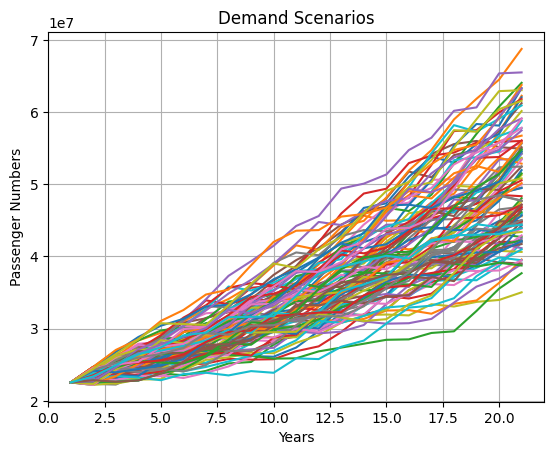

<Figure size 640x480 with 0 Axes>

In [19]:
# Demand at t0
Dt0 = 22561132
# Steptime [Years]
dt = 1
# Time Horizon of Forecasts
Fth = 21
# Number of Forecasts
Forecasts = 100

# Importing the Functions File
import Functions as fn

# Callint the Scenario Creation Function
Scenario = fn.Scenario_creation(mu, sigma, Dt0, dt, Fth, Forecasts)

# Calling the Scenario Plotting Function
fn.Scenario_plot(Scenario, Fth, "Demand Scenarios")

## Calculation of the Traditional NPV


Inputs for NPV Calculation

In [20]:
r_D = 0.03  # Revenues per Unit of Demand per Period
r_K = 0.03  # Revenues per Unit of Capacity per Period
co_K = 0.01  # Operational costs per unit of capacity per period
co_D = 0.004  # Operational cost per unit of demand per period
ci_K = 10  # Installation cost per unit of capacity
discount = 0.05  # Discount factor
EoS = 0.85  # EoS factor

D = Scenario  # Assinging the Scenarios as Demand

Exporting Data

In [21]:
# D_rounded = np.round(D / 1000000) * 1000000
# D = D_rounded

df2 = pd.DataFrame(D)
excel_file = "output.xlsx"
df2.to_excel(excel_file, index=False)

Creation of a mean Capacity Estimation

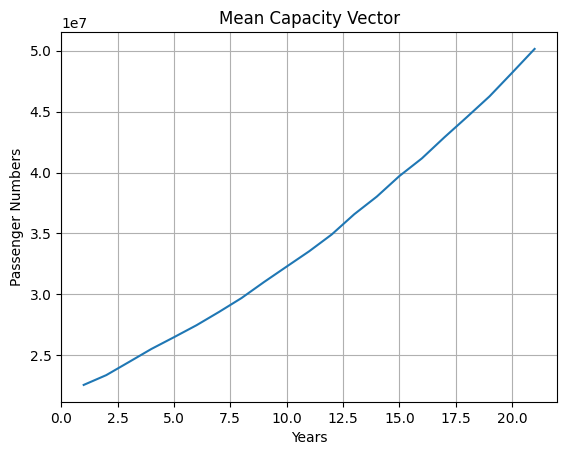

<Figure size 640x480 with 0 Axes>

In [22]:
# Calculate a Mean Scenario as Estimation Vector
meansvalues = np.mean(Scenario, axis=0)

# # Creation of a time vector
# t = np.arange(0, Fth, dt)

# Assinging the Mean Sceanrio as Capacity Vector
capacity_vector = meansvalues
fn.Scenario_plot(capacity_vector, Fth, "Mean Capacity Vector")

Creation of a Staircase Vector based on the Capacity Estimation

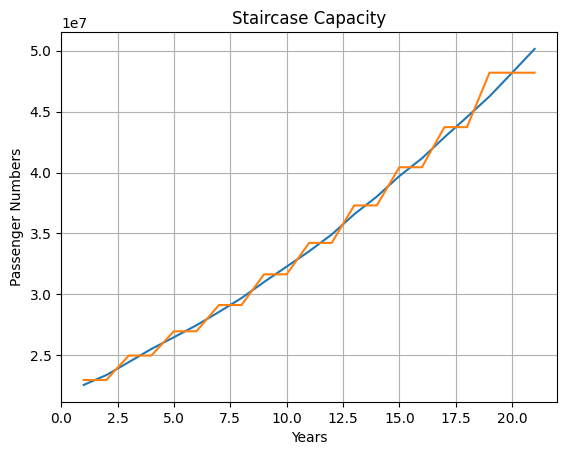

<Figure size 640x480 with 0 Axes>

In [23]:
# Number of Capacity Changes
num_steps = 10
# Qunatify the nonlinear Capacity Vector into a Step Vector
bin_size = len(capacity_vector) // num_steps
staircase_vector = np.zeros(len(capacity_vector))
for i in range(num_steps):
    start_idx = i * bin_size
    end_idx = (i + 1) * bin_size
    if i == num_steps - 1:
        end_idx = len(capacity_vector)
    avg_value = np.mean(capacity_vector[start_idx:end_idx])
    staircase_vector[start_idx:end_idx] = avg_value

K = staircase_vector
Capacity_plot = np.array([capacity_vector, staircase_vector])
fn.Scenario_plot(Capacity_plot, Fth, "Staircase Capacity")

Calling the NPV Calculation Function

In [24]:
K2 = np.array(
    [25, 25, 25, 25, 25, 30, 30, 30, 30, 30, 40, 40, 40, 40, 40, 50, 50, 50, 50, 50, 50]
)

K = K2 * 1000000

In [25]:
NPVs = fn.NPV_Calculation(D, K, Fth, dt, r_D, r_K, co_K, co_D, ci_K, discount, EoS)
print("Traditional NPVs = ", NPVs)

Traditional NPVs =  [7126416.99448222 7752228.5747902  6769505.25886982 6369129.61644211
 7690699.71379902 8346628.35434934 8091641.84282358 6412554.33512073
 5340299.49916692 5822939.4857043  5866902.94309839 5489856.83183772
 5921398.81983488 5429024.57480469 5708169.2844257  8353751.5995664
 5407887.35546874 6419086.21855578 6488056.891806   5867705.57654754
 8088655.95542394 8959489.52510534 7338370.32528855 8281192.98192117
 6207637.85292427 6708197.47742802 6119026.72863592 6746407.86748864
 5567996.03833816 6968256.20520379 7854675.78250774 7151578.35050969
 4880944.88026572 8490356.8643627  5802943.4177912  6086723.27213396
 6472838.2933847  6662341.25302431 6971326.66800989 7161816.63396321
 6461105.87703194 7305780.14560036 6138766.26314968 6108606.7975825
 6190874.52328578 6084231.19824099 6859677.08949894 7210470.38938483
 7581680.21013009 8090801.20869026 5895831.19954977 6546567.28669775
 8198489.00787277 6279522.10055729 9387290.90278087 7102261.04420611
 7182650.8551921

Calculating the ENPV

In [26]:
ENPV = np.mean(NPVs)
print("Traditional ENPV = ", ENPV)

Traditional ENPV =  6862049.151134952


## Creating a Flexible Capacity Vector

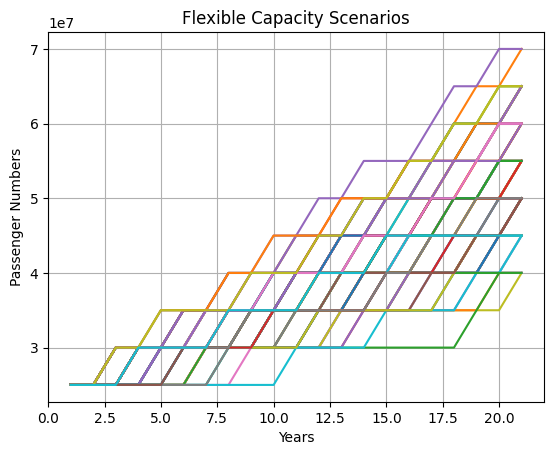

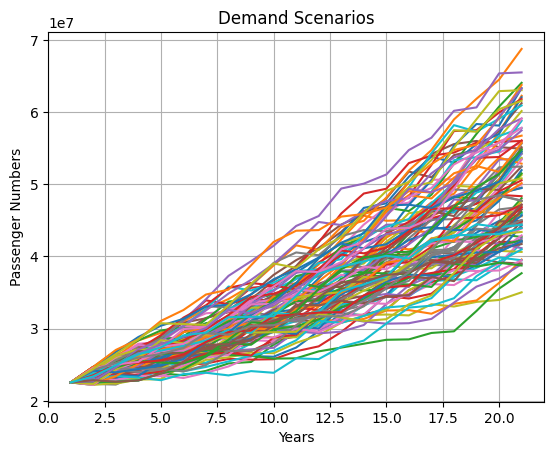

<Figure size 640x480 with 0 Axes>

In [27]:
# Initial Capacity
K0 = 25000000
# Capacity Increase Vector
deltaK_Flex = [5000000, 10000000, 20000000]

Flexible_Capacity = fn.Decision_Rule(D, K0, deltaK_Flex)

fn.Scenario_plot(Flexible_Capacity, Fth, "Flexible Capacity Scenarios")
fn.Scenario_plot(D, Fth, "Demand Scenarios")

## Calculation of NPV using the Flexible Capacity Vector

In [28]:
NPV2 = []
for liste in range(Flexible_Capacity.shape[0]):
    result = fn.NPV_Calculation(D, Flexible_Capacity[liste], Fth, dt)
    NPV2.append(result[liste])
print("new NPVs = ", NPV2)

new NPVs =  [-827563.0628966661, -4974585.376944845, 2797073.044403145, 1072762.4055092232, -1102107.0206530932, -4882082.197923672, -3386966.18983501, 1095843.4714398119, 5117197.868250917, 2723321.3322007954, 1116308.9544385618, 4769961.916808006, 1632699.3385879218, 3327406.17485728, 5050151.513098079, -3333544.5006146925, 3635784.7125306726, 973336.1027452282, 1264130.7377456774, 1576533.0425288565, -4970295.250051657, -6876882.45420482, -990940.5203390052, -4835265.673449597, 2673604.101762455, 2931232.792147804, 3063048.7268198645, 963046.3631722847, 3286050.399721941, -2913147.7341561997, -4908956.161560445, -1187370.2891407674, 5178761.984917789, -3513028.0101381782, 3085269.9758013845, 3022939.526562945, 1360169.3547984362, 1304512.1813833185, -754836.9761520904, -889180.5732593673, -517849.38265144103, -1109298.708906537, 2958230.6011138503, 3189548.8701527454, 2966889.0443001813, 4965704.676527999, 774524.0796856455, -2693348.4943004553, -4811217.434385903, -4896627.28626265

Calculating the new ENPV

In [29]:
ENPV2 = np.average(NPV2)
print("Traditional ENPV = ", ENPV)
print("Flexible ENPV = ", ENPV2)

Traditional ENPV =  6862049.151134952
Flexible ENPV =  12235.050505506117


## Plotting Historic Data (For Reference Only)
Plotting Excel Data (Specific to Sample Excel, all other Inputs need to be adjusted to it)

In [30]:
# # Plotting Excel Data (only specific to Test Excel, keys needs to be changed for other
# # data)

# plt.plot(
#     Year,
#     Historic_Demand,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Demand for Zurich Airport")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Annual_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Change of Passenger Demand")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Percentage_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Percentage Change of Passenger Demand")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Percentage_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Change of Passenger Demand Excluding Outlayers")
# plt.legend()  # Display legend
# plt.figure()